<a href="https://colab.research.google.com/github/Crystal-star1/AgriTech-Plant-Disease-Detection/blob/main/Plant_Disease_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plant Disease Classification Project
## Phase 1: Data Acquisition & Auditing

### Step 1: Setting up the Environment

Before we can access the data, we need to configure our environment to talk to Kaggle. Kaggle uses an API token (`kaggle.json`) for authentication. This cell installs the necessary library, prompts you to upload your token, and moves it to a secure hidden directory so the system can find it. We also set the file permissions to `600` to ensure no other users on the system can read your API key.

In [ ]:
import os

# 1. Install the Kaggle library
!pip install -q kaggle

# 2. Upload your kaggle.json file
from google.colab import files
print("Please upload your kaggle.json file now...")
files.upload()

# 3. Move the token to the correct spot and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4. Download the dataset (Plant Disease)
print("Downloading dataset...")
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# 5. Unzip it
print("Unzipping data...")
!unzip -q new-plant-diseases-dataset.zip -d ./plant_disease_data

print("Done! Data is ready at ./plant_disease_data")

Please upload your kaggle.json file now...


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:33<00:00, 255MB/s]
100% 2.70G/2.70G [00:33<00:00, 85.6MB/s]
Unzipping data...
Done! Data is ready at ./plant_disease_data


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# UPDATE: Pointing to the unzipped location in Colab
# Note: Kaggle datasets often have nested folders. We target the 'train' folder.
DATA_DIR = "./plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

def audit_image_data(root_dir):
    stats = {
        "total_files": 0,
        "readable_images": 0,
        "corrupt_files": [],
        "classes": {}
    }


    # Check if path exists first
    if not os.path.exists(root_dir):
        print(f"Error: Path not found at {root_dir}")
        print("Check your folder structure using !ls ./plant_disease_data")
        return stats

    print(f"Scanning directory: {root_dir}")

    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        stats["classes"][class_name] = 0

        # We limit the scan to the first 50 images per class for speed in this initial check
        files = os.listdir(class_path)
        for img_name in tqdm(files[:50], desc=f"Checking {class_name}"):
            img_path = os.path.join(class_path, img_name)
            stats["total_files"] += 1

            try:
                # Attempt to read
                img = cv2.imread(img_path)
                if img is None:
                    stats["corrupt_files"].append(img_path)
                else:
                    stats["readable_images"] += 1
                    stats["classes"][class_name] += 1
            except:
                stats["corrupt_files"].append(img_path)

    return stats

# Run Audit
audit_results = audit_image_data(DATA_DIR)

print("\n QUICK AUDIT REPORT ")
print(f"Total Files Checked: {audit_results['total_files']}")
print(f"Readable: {audit_results['readable_images']}")
print(f"Corrupt: {len(audit_results['corrupt_files'])}")

Scanning directory: ./plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train


Checking Grape___Black_rot: 100%|██████████| 50/50 [00:00<00:00, 1272.40it/s]
Checking Tomato___Spider_mites Two-spotted_spider_mite: 100%|██████████| 50/50 [00:00<00:00, 1271.25it/s]
Checking Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 100%|██████████| 50/50 [00:00<00:00, 1311.95it/s]
Checking Apple___Apple_scab: 100%|██████████| 50/50 [00:00<00:00, 1284.59it/s]
Checking Cherry_(including_sour)___Powdery_mildew: 100%|██████████| 50/50 [00:00<00:00, 1518.55it/s]
Checking Orange___Haunglongbing_(Citrus_greening): 100%|██████████| 50/50 [00:00<00:00, 1598.73it/s]
Checking Strawberry___Leaf_scorch: 100%|██████████| 50/50 [00:00<00:00, 1898.37it/s]
Checking Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 100%|██████████| 50/50 [00:00<00:00, 1894.69it/s]
Checking Strawberry___healthy: 100%|██████████| 50/50 [00:00<00:00, 1813.58it/s]


 QUICK AUDIT REPORT 
Total Files Checked: 1900
Readable: 1900
Corrupt: 0


Analyzing distribution in: ./plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train


/tmp/ipython-input-2361876977.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=names, palette="viridis")


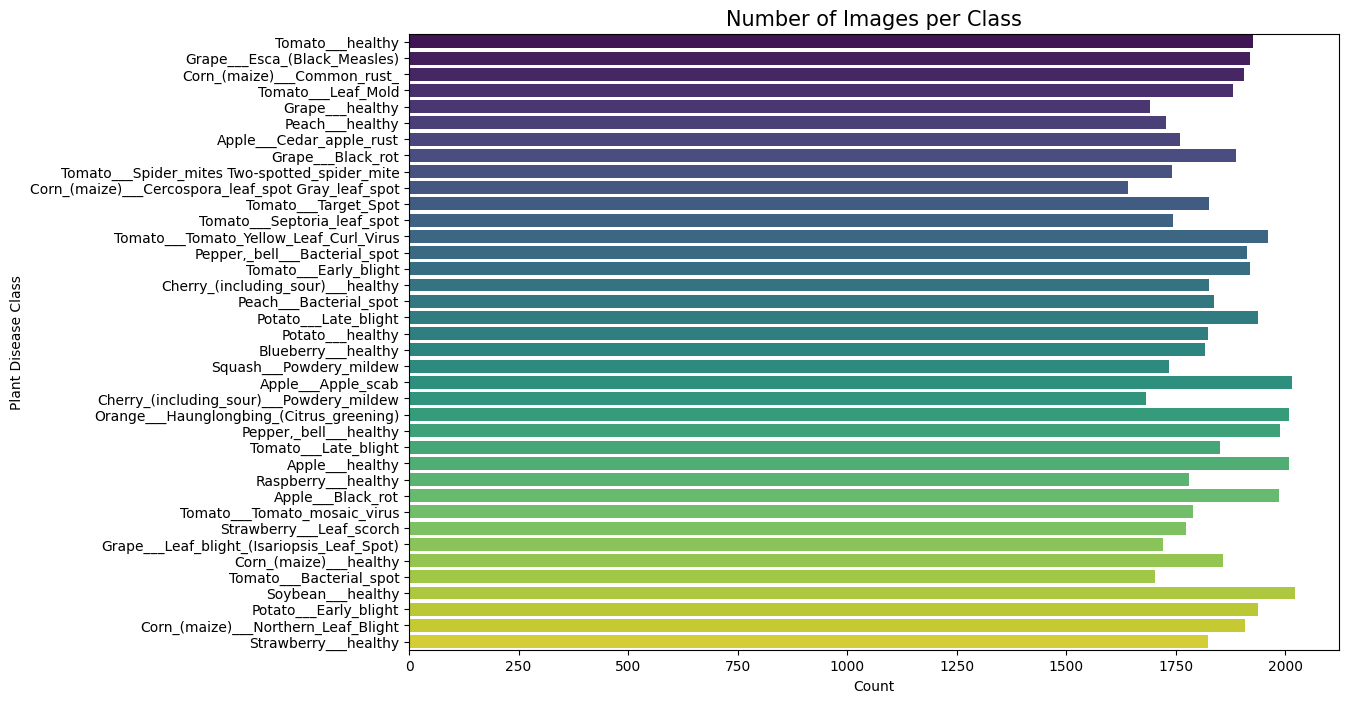

Min images in a class: 1642
Max images in a class: 2022


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse the correct path found in the previous step
# DATA_DIR should be set from the previous successful run
print(f"Analyzing distribution in: {DATA_DIR}")

class_counts = {}

# Quick count of all files
for class_name in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Convert to lists for plotting
names = list(class_counts.keys())
values = list(class_counts.values())

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=values, y=names, palette="viridis")
plt.title("Number of Images per Class", fontsize=15)
plt.xlabel("Count")
plt.ylabel("Plant Disease Class")
plt.show()

# Print summary
print(f"Min images in a class: {min(values)}")
print(f"Max images in a class: {max(values)}")

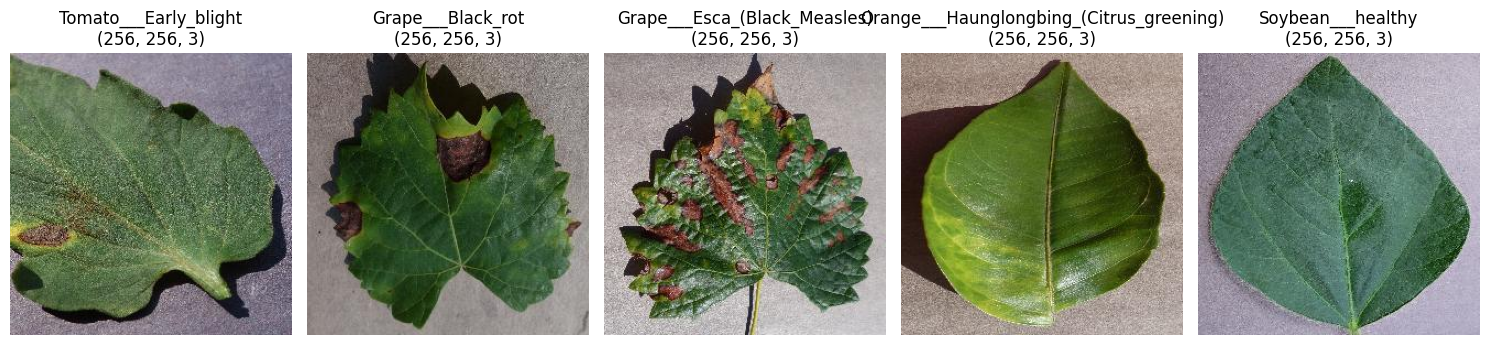

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt

def visualize_samples(root_dir, num_samples=4):
    classes = os.listdir(root_dir)
    # Pick random classes
    selected_classes = random.sample(classes, num_samples)

    plt.figure(figsize=(15, 5))

    for i, class_name in enumerate(selected_classes):
        class_path = os.path.join(root_dir, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)

        # Load and convert to RGB (OpenCV loads as BGR by default)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{class_name}\n{img.shape}") # Show name and dimension
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Run visualization
visualize_samples(DATA_DIR, num_samples=5)

Calculating blur scores (this may take a moment)...


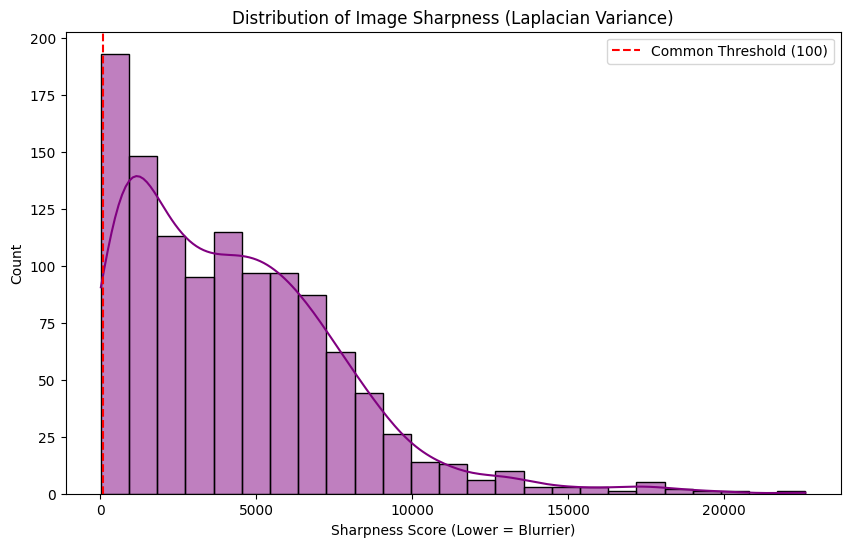

Average Sharpness: 4287.66
Min Sharpness: 16.88


In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_blur_scores(root_dir, samples_per_class=20):
    blur_scores = []

    # Iterate through classes
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # Grab a sample of images to save time
        images = os.listdir(class_path)[:samples_per_class]

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            # 1. Read Image
            img = cv2.imread(img_path)
            if img is None: continue

            # 2. Convert to Grayscale (Laplacian needs grayscale)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # 3. Calculate Variance of Laplacian
            # This returns a single number representing "sharpness"
            score = cv2.Laplacian(gray, cv2.CV_64F).var()
            blur_scores.append(score)

    return blur_scores

print("Calculating blur scores (this may take a moment)...")
scores = calculate_blur_scores(DATA_DIR, samples_per_class=30)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(scores, kde=True, color="purple")
plt.title("Distribution of Image Sharpness (Laplacian Variance)")
plt.xlabel("Sharpness Score (Lower = Blurrier)")
plt.axvline(x=100, color='r', linestyle='--', label="Common Threshold (100)")
plt.legend()
plt.show()

print(f"Average Sharpness: {np.mean(scores):.2f}")
print(f"Min Sharpness: {np.min(scores):.2f}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CONFIGURATION
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
RANDOM_SEED = 42

print("Setting up Data Generators...")

# 1. Define the Generator with Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values (0-255 -> 0-1)
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Shift image horizontally
    height_shift_range=0.2,   # Shift image vertically
    horizontal_flip=True,     # Mirror image
    fill_mode='nearest',      # How to fill new pixels created by shifting
    validation_split=0.2      # Set aside 20% for validation
)

# 2. Define a separate Generator for Validation (no augmentation, no shuffling for evaluation)
val_datagen = ImageDataGenerator(rescale=1./255)

# 3. Load Training Data (Subset: Training)
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', # We have multiple classes (not just binary)
    subset='training',        # Specify this is the training set
    seed=RANDOM_SEED
)

# 4. Load Validation Data (Separate generator, no augmentation, shuffle=False)
val_generator = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',      # Specify this is the validation set
    shuffle=False,            # IMPORTANT: Set to False for correct evaluation order
    seed=RANDOM_SEED
)

print("\nData Pipeline Ready.")
print(f"Class Mapping: {list(train_generator.class_indices.keys())[:5]} ...") # Show first 5 classes

Setting up Data Generators...
Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.

Data Pipeline Ready.
Class Mapping: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy'] ...


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_model(num_classes):
    # 1. Load the pre-trained base model
    # include_top=False removes the final classification layer (which was for 1000 things, not our plants)
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # 2. Freeze the base model (so we don't ruin the pre-trained weights)
    base_model.trainable = False

    # 3. Add our custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)  # Regularization

    # Final Output Layer (38 classes)
    predictions = Dense(num_classes, activation='softmax')(x)

    # 4. Glue it all together
    model = Model(inputs=base_model.input, outputs=predictions)

    return model

# Initialize the model
model = build_model(num_classes=38)

# 5. Compile the model
# We use Adam optimizer with a low learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the architecture
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,306,662 (8.80 MB)

 Trainable params: 48,678 (190.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime

# 1. Define Callbacks
checkpoint = ModelCheckpoint(
    'best_plant_model.keras',     # File to save
    monitor='val_accuracy',       # What to watch
    save_best_only=True,          # Overwrite only if it's better
    mode='max',                   # We want accuracy to go UP
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',           # Stop if loss stops going down
    patience=3,                   # Give it 3 chances (epochs) to improve
    restore_best_weights=True,    # Go back to the best version when stopping
    verbose=1
)

# 2. Train the Model
print(f"Starting training at {datetime.datetime.now().strftime('%H:%M:%S')}...")

history = model.fit(
    train_generator,
    epochs=2,                    # Max loops (might stop early)
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

print(f"Training finished at {datetime.datetime.now().strftime('%H:%M:%S')}")

Starting training at 05:35:36...
Epoch 1/2
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9030 - loss: 0.3008
Epoch 1: val_accuracy improved from -inf to 0.91377, saving model to best_plant_model.keras
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 856s 487ms/step - accuracy: 0.9030 - loss: 0.3008 - val_accuracy: 0.9138 - val_loss: 0.2605
Epoch 2/2
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9111 - loss: 0.2704
Epoch 2: val_accuracy improved from 0.91377 to 0.91925, saving model to best_plant_model.keras
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 856s 487ms/step - accuracy: 0.9111 - loss: 0.2704 - val_accuracy: 0.9193 - val_loss: 0.2483
Restoring model weights from the end of the best epoch: 2.
Training finished at 06:04:11


Loading best model...
Running predictions on validation set (this takes 1-2 mins)...
439/439 ━━━━━━━━━━━━━━━━━━━━ 187s 414ms/step


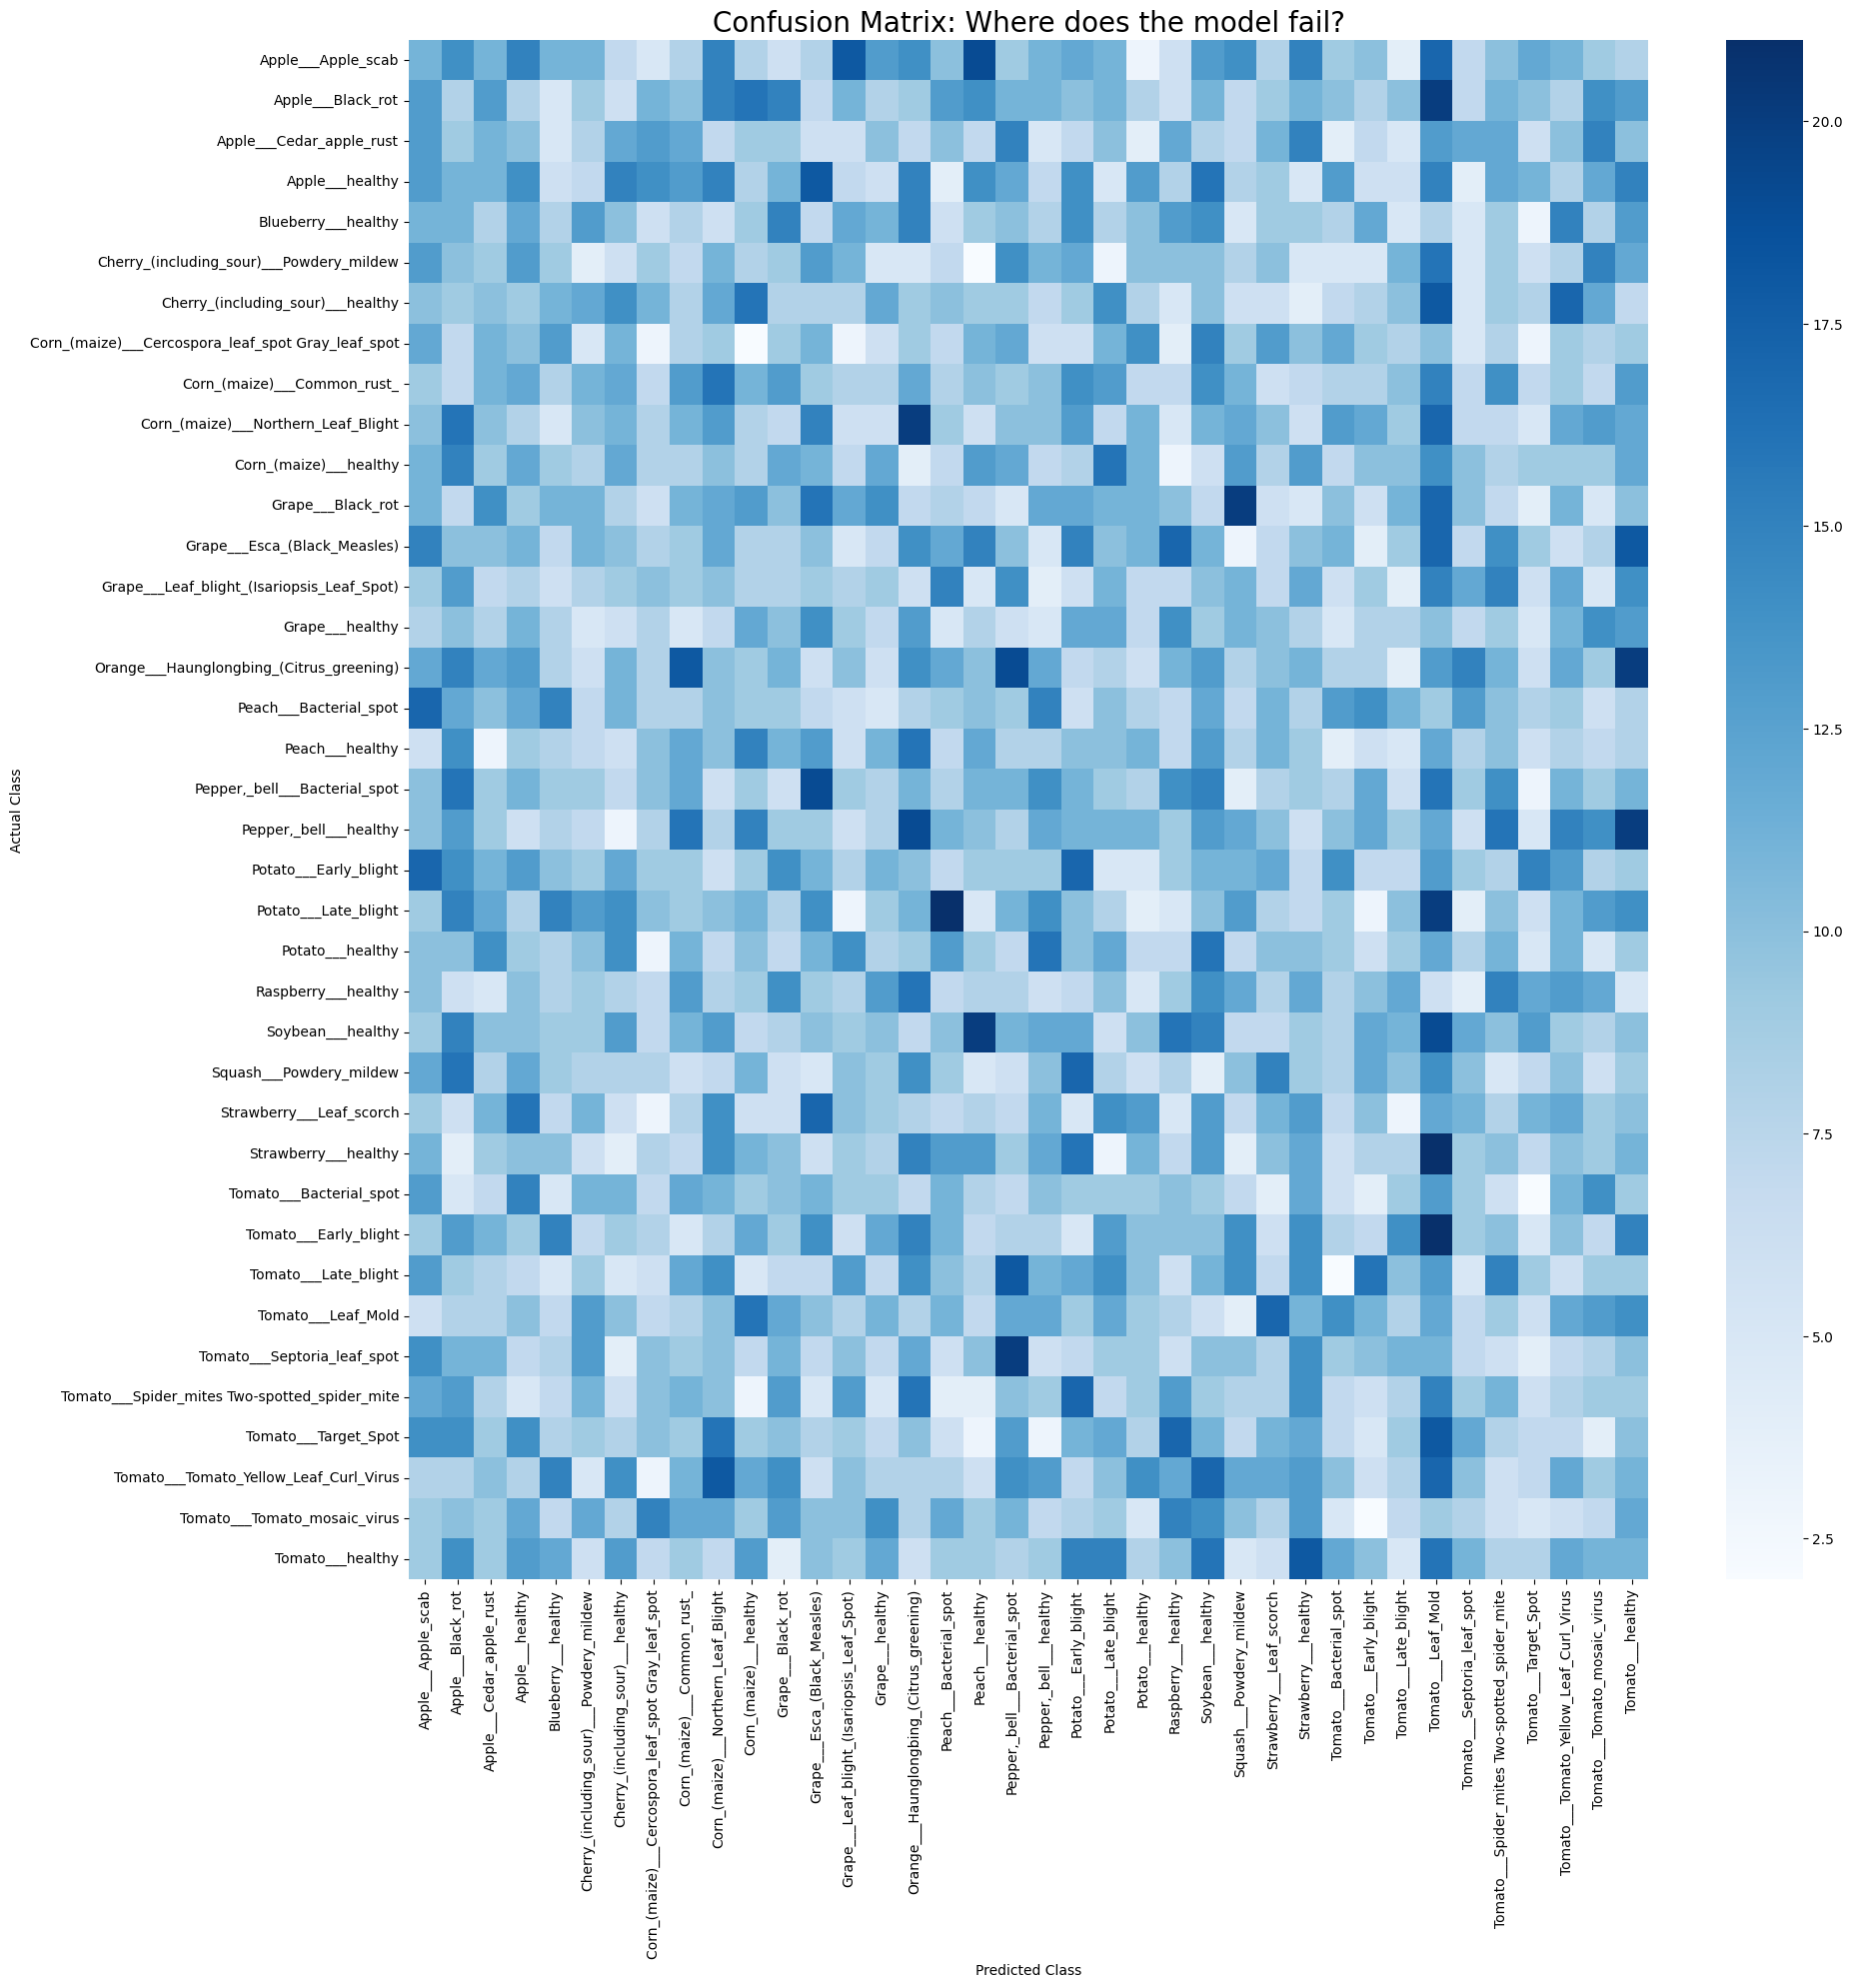


--- CLASSIFICATION REPORT ---
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       403
                                 Apple___Black_rot       0.02      0.02      0.02       397
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       352
                                   Apple___healthy       0.03      0.03      0.03       401
                               Blueberry___healthy       0.02      0.02      0.02       363
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       336
                 Cherry_(including_sour)___healthy       0.04      0.04      0.04       365
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.01      0.01      0.01       328
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       381
               Corn_(maize)___Northern_Leaf_Blig

In [15]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# 1. Load the best saved model
# (This ensures we use the best version, not the last random state)
print("Loading best model...")
saved_model = load_model('best_plant_model.keras')

# 2. Get Predictions
print("Running predictions on validation set (this takes 1-2 mins)...")
# We need to reset the validation generator to ensure order matches labels
val_generator.reset()

# Get the raw probability scores
predictions = saved_model.predict(val_generator, verbose=1)

# Convert probabilities to class labels (0, 1, 2...)
y_pred = np.argmax(predictions, axis=1)

# Get the actual true labels
y_true = val_generator.classes

# 3. Generate the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Visualization
plt.figure(figsize=(20, 20)) # Big size for 38 classes
sns.heatmap(cm,
            annot=False,      # Too cluttered if we annotate every box
            fmt='d',
            xticklabels=list(val_generator.class_indices.keys()),
            yticklabels=list(val_generator.class_indices.keys()),
            cmap='Blues')
plt.title("Confusion Matrix: Where does the model fail?", fontsize=20)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=90)
plt.show()

# 5. Print a text report for details
print("\n CLASSIFICATION REPORT ")
class_names = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

Testing on image: ./plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy/36bdc44c-96a4-40bb-86f7-63a91d706e96___RS_HL 4203_newGGR.JPG


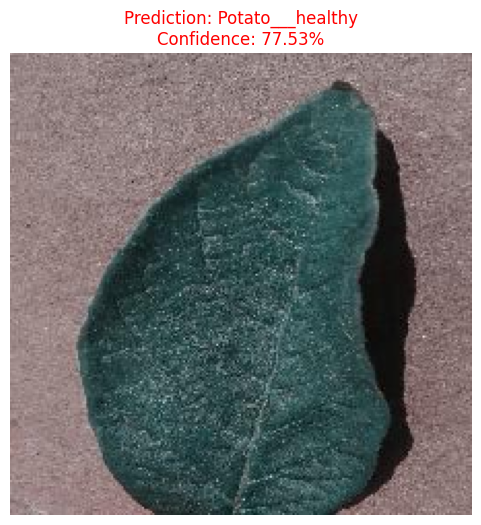

'Potato___healthy'

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Get a dictionary of our class names (e.g., {0: 'Apple___Black_rot', 1: '...'})
class_map = {v: k for k, v in train_generator.class_indices.items()}

def predict_disease(image_path):
    # 1. Load and Resize
    # We must match the input size of the model (224x224)
    img = image.load_img(image_path, target_size=(224, 224))

    # 2. Convert to Array and Normalize
    # (Matches our rescale=1./255 from training)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0

    # 3. Add Batch Dimension
    # The model expects a batch of images (1, 224, 224, 3), not just one.
    img_array = np.expand_dims(img_array, axis=0)

    # 4. Predict
    predictions = model.predict(img_array, verbose=0)

    # 5. Decode Result
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_map[predicted_class_index]
    confidence = np.max(predictions)

    # 6. Display
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2%}",
              color="green" if confidence > 0.8 else "red")
    plt.axis('off')
    plt.show()

    return predicted_label

#  TEST IT
# Pick a random image from the validation folder to test
import random

# Choose a random class
random_class = random.choice(os.listdir(DATA_DIR))
random_class_path = os.path.join(DATA_DIR, random_class)

# Choose a random image inside that class
random_image = random.choice(os.listdir(random_class_path))
path_to_test = os.path.join(random_class_path, random_image)

print(f"Testing on image: {path_to_test}")
predict_disease(path_to_test)